In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix,classification_report

df=pd.read_csv(r".\data\Titanic_test.csv")
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [3]:
df.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [4]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
df.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

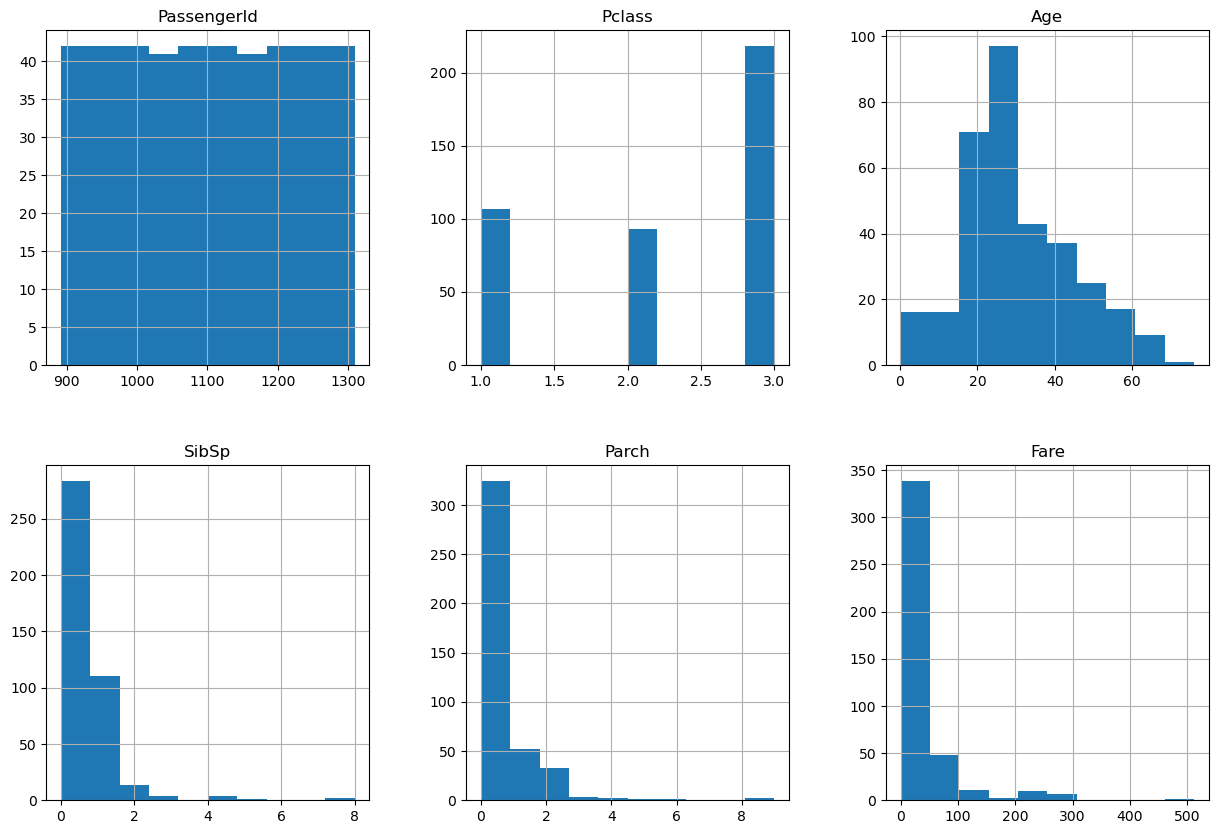

In [6]:
df.hist(layout=(2,3),figsize=(15,10))

In [7]:
df.corr(numeric_only=True)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.026751,-0.034102,0.003818,0.043080,0.008211
Pclass,-0.026751,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,-0.577147,0.337932,0.171539,0.230046,1.000000


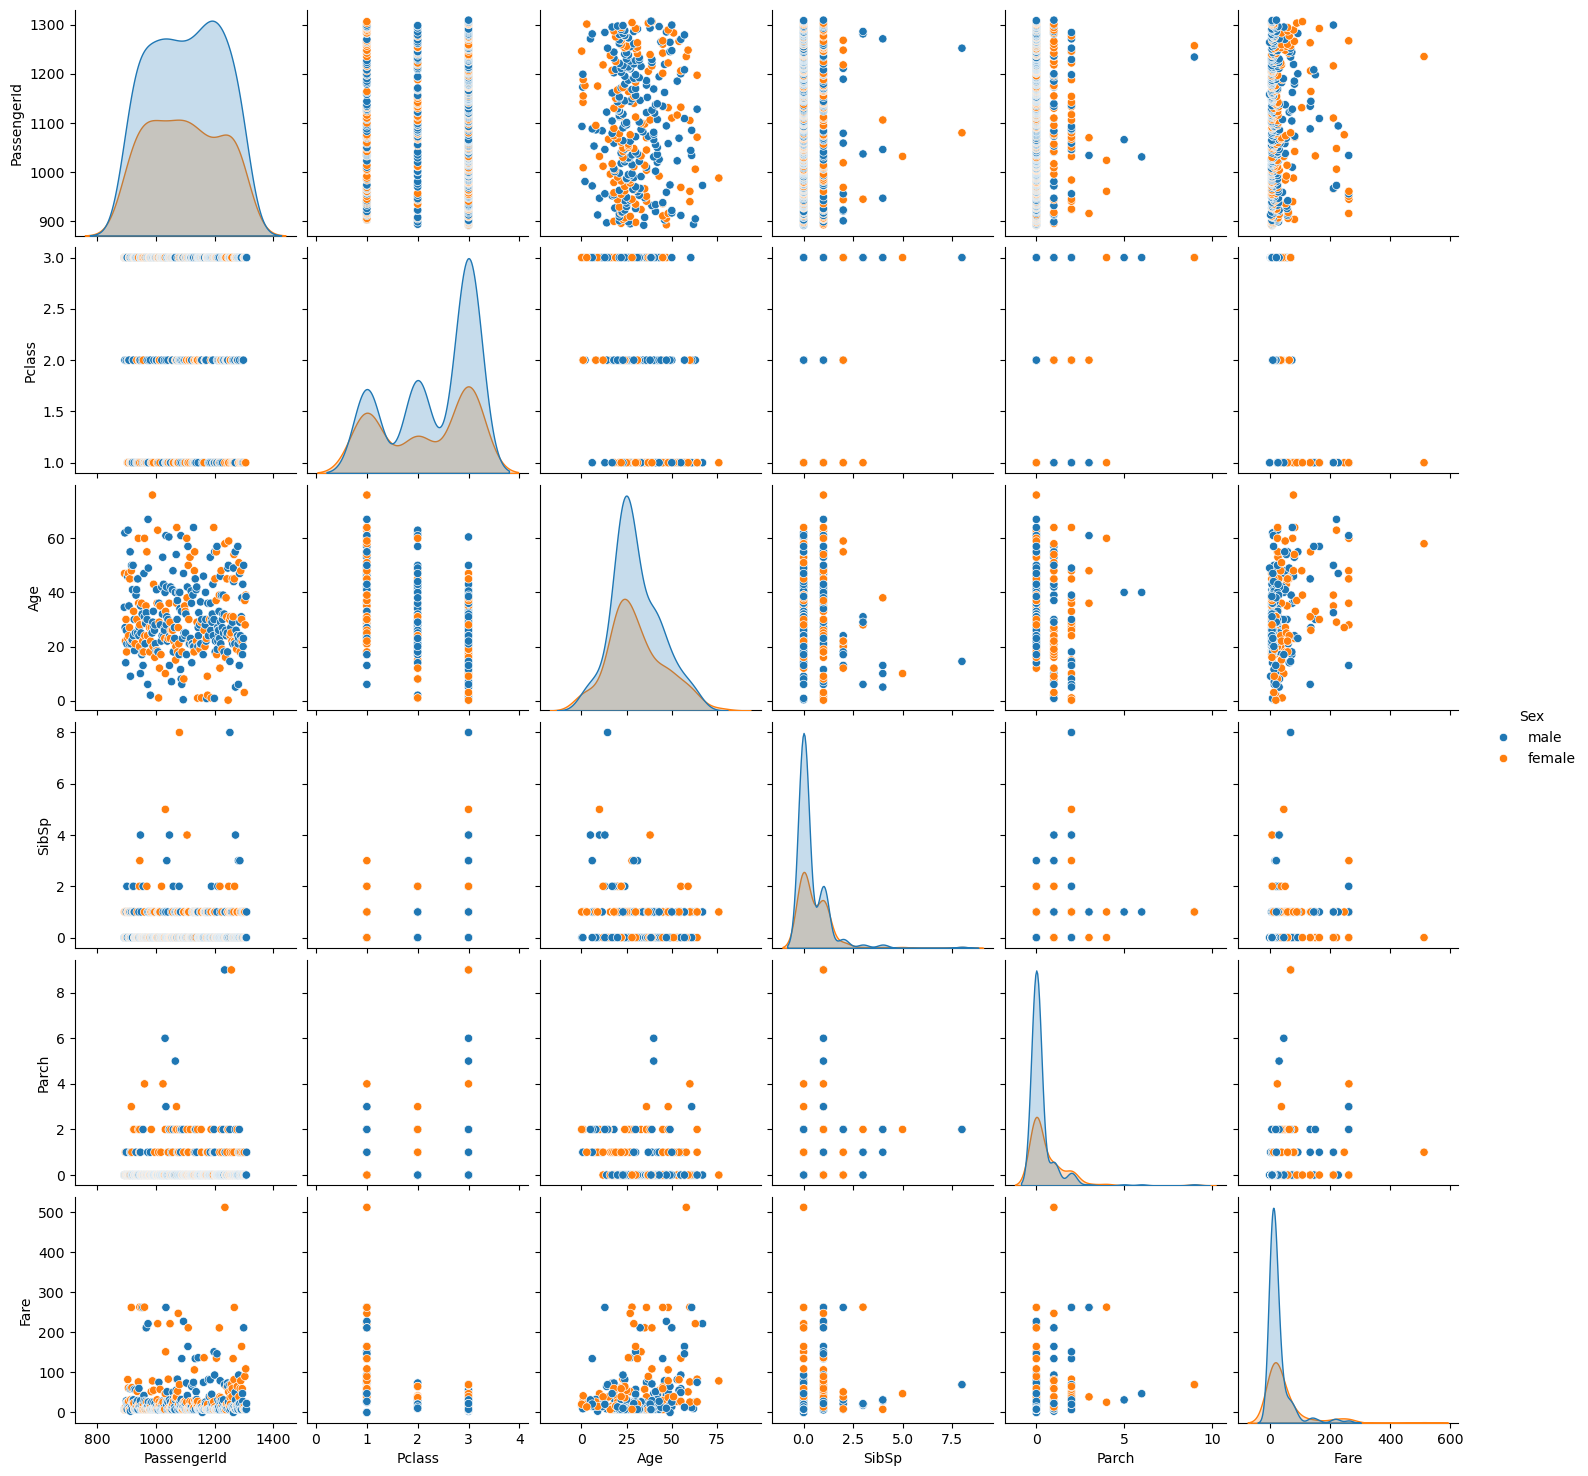

In [8]:
sns.pairplot(df,hue="Sex")

In [9]:
df=pd.read_csv(r".\data\Titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [12]:
# From the above observations we could conclude that PassengerId, Name and Ticket is most likely the unique identifiers. 
# So, it won't be much useful for our model

In [13]:
df=df.drop(["PassengerId","Name","Ticket"],axis=1)

<Axes: xlabel='Age', ylabel='Count'>

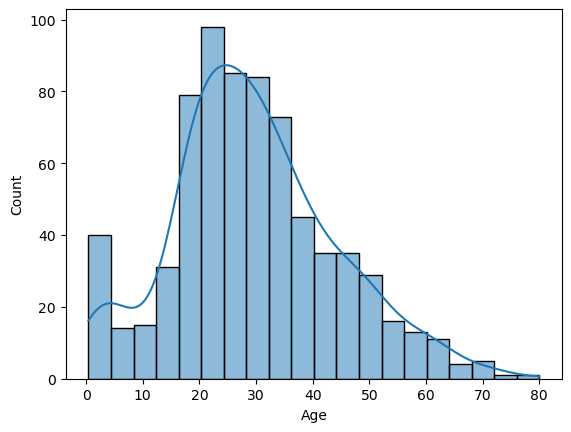

In [14]:
sns.histplot(df["Age"],kde=True)

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

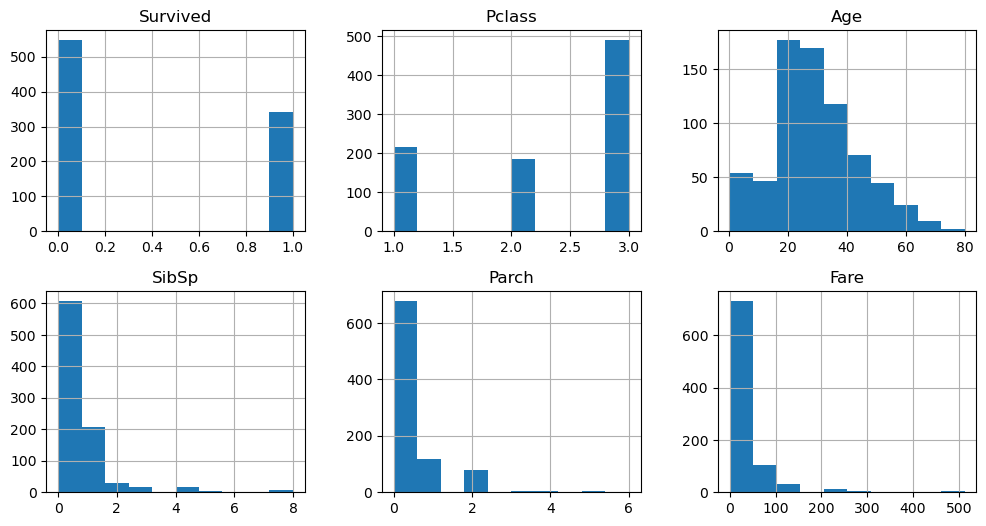

In [15]:
df.hist(layout=(2,3),figsize=(12,6))

In [16]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [17]:
# From above observation Age, Cabin and Embarked columns are having huge null values but they could really influence the survival of passengers.
# So, for the null values in age we will use median of age and for null value in Cabin we will create a update it with whether they had cabin or not

Median_age=np.nanmedian(df["Age"])
most_common_port = df['Embarked'].mode()[0]

# 2. Fill the missing values
df['Embarked'] = df['Embarked'].fillna(most_common_port)
df["Age"]=df["Age"].fillna(Median_age)
df["Cabin"]=df["Cabin"].notna().astype(int)

In [18]:
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Cabin         2
Embarked      3
dtype: int64

In [19]:
df["Embarked"].isnull().sum()

0

In [20]:
# Now we have zero null values.

# Converting 'Sex' and 'Embarked' into dummy variables
# drop_first=True prevents the 'Dummy Variable Trap' 
# (e.g., instead of having Male and Female columns, it just makes a 'male' column: 1=Yes, 0=No)
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True).astype(int)

# Separate Features (X) and Target (y)
X = df.drop('Survived', axis=1)
y = df['Survived']


In [21]:
(X.head(),y.head())

(   Pclass  Age  SibSp  Parch  Fare  Cabin  Sex_male  Embarked_Q  Embarked_S
 0       3   22      1      0     7      0         1           0           1
 1       1   38      1      0    71      1         0           0           0
 2       3   26      0      0     7      0         0           0           1
 3       1   35      1      0    53      1         0           0           1
 4       3   35      0      0     8      0         1           0           1,
 0    0
 1    1
 2    1
 3    1
 4    0
 Name: Survived, dtype: int32)

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)
(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

((712, 9), (712,), (179, 9), (179,))

In [23]:
scale=StandardScaler()
scaled_X_train=scale.fit_transform(X_train)

In [24]:
model=LogisticRegression()
model.fit(scaled_X_train,Y_train)

NameError: name 'LogisticRegression' is not defined

In [ ]:
scaled_X_test=scale.fit_transform(X_test)
Y_pred=model.predict(scaled_X_test)

In [ ]:
print(f"Training Acuracy: {model.score(scaled_X_train,Y_train):.3f}")
print(f"Testing Acuracy: {model.score(scaled_X_test,Y_test):.3f}")

In [ ]:
cm=confusion_matrix(Y_test,Y_pred)
print(cm)
print(classification_report(Y_test,Y_pred))

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted: Died', 'Predicted: Survived'],
            yticklabels=['Actual: Died', 'Actual: Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Please note in the confusion metrics or anywhere please use the actual value and then predicted value
## [ TN  FP ] 
## [ TP  FN ]
- True Positive (TP) :	Model said "Positive" and it was the Truth.	Model predicted they survived, and they did survive.
- True Negative (TN) :	Model said "Negative" and it was the Truth.	Model predicted they died, and they did die.
- False Positive (FP):	Model said "Positive" but it was a Falsehood.	Model predicted they survived, but they actually died. (The "False Alarm")
- False Negative (FN):	Model said "Negative" but it was a Falsehood.	Model predicted they died, but they actually lived. (The "Missed One")
- Top Row: All the people who Actually Died (0).
- Bottom Row: All the people who Actually Survived (1).
- Left Column: All the people the model Predicted to Die (0).
- Right Column: All the people the model Predicted to Survive (1).

In [ ]:
from sklearn.metrics import roc_curve,auc

# Prediction on the test set
y_prob=model.predict_proba(scaled_X_test)[:,1]
# ROC (Receiver Operating Characteristic) curve and AUC (Area Under Curve)
fpr,tpr,thresholds=roc_curve(Y_test,y_prob,pos_label=1)
roc_auc=auc(fpr,tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--') # The "Random" line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Titanic Survival')
plt.legend()
plt.grid(True)
plt.show()

### An ROC curve is a graph that shows the performance of a classification model by plotting two metrics against each other:
- Y-Axis: True Positive Rate (TPR) This is the same as Recall.
- Question: "Of the people who actually survived, how many did we catch?"
- X-Axis: False Positive Rate (FPR)
- Question: "Of the people who actually died, how many did we wrongly guess survived?" (False alarms).

#### The Logic:A Logistic Regression model doesn't just output a 0 or 1; it outputs a probability (e.g., "This person has a 72% chance of surviving").

- Usually, we use a 0.5 threshold (if $>0.5$, they survived).
- The ROC curve moves that threshold from 0 to 1 and plots the results.
- A Perfect Model would go straight up the Y-axis and then across (filling the whole top-left corner).
- A Random Model would be a diagonal 45-degree line.



In [ ]:
X_test.head()

In [ ]:
# ===================== SAVE MODEL =====================

import joblib
joblib.dump(model, "model.pkl")
joblib.dump(scale,"scale.pkl")
print("Saved model and scale as model.pkl and scale.pkl")

#### 1. What is the difference between precision and recall?

## Precision

##### Precision: for Question : When the model said Positive how often it was actually right ?
### Precision=TP/(TP+FP)
#### Focus: Avoiding "False Alarms" (False Positives).
#### Precision	Accuracy of "Yes" guesses.	Precision = Picky

## Recall
##### Recall(Sensitivity): for Question : Of all the people who actually survived, how many did the model find?
### Recall=TP/(TP+FN)
#### Focus: Avoiding "Missed Cases" (False Negatives).
#### Recall	Ability to find all "Yes" cases.	Recall = Rescue


#### 2. What is cross-validation, and why is it important in binary classification?
Cross-validation is a statistical technique used to evaluate the performance of a machine learning model by partitioning the available data into multiple subsets.1The most common version is K-Fold Cross-Validation, where:The dataset is split into 2$K$ equal parts (usually 5 or 10).3The model is trained 4$K$ times.5In each iteration, one "fold" is held out as the test set (validation set), while the remaining 6$K-1$ folds are used for training.7The final performance score is the average of the results from all 8$K$ iterations.

Cross-validation is important because it provides a reliable, low-variance estimate of model performance, ensuring that the classifier generalizes well to unseen data rather than just performing well on one specific random split